In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Funciones import mm_a_grados, generar_puntos_circunferencia
import matplotlib.ticker as ticker
from matplotlib.patches import Circle

In [3]:
def graficar_escotoma_real(prueba):
    x = prueba['coordenada x [mm]']
    y = prueba['coordenada y [mm]']
    fallos_x, fallos_y = [],[]
    for i in range(len(x)):
        fallos = prueba['frecuencia de fallos'][i]
        for j in range(fallos):
            fallos_x.append(x[i])
            fallos_y.append(y[i])
    x_mediana = np.median(fallos_x)
    y_mediana = np.median(fallos_y)
    return x_mediana,y_mediana

def grafica(prueba, Sujeto, Ojo, tipo_de_prueba):
    plt.figure(figsize=(10, 6))
    
    # Colores y contornos
    color_contorno = {
        0: ('white', 'black'),
        1: ('grey', 'grey'),
        2: ('black', 'black')
    }
    
    for i in range(len(prueba)):
        color, contorno = color_contorno[prueba['frecuencia de fallos'][i]]
        
        plt.scatter(mm_a_grados(prueba['coordenada x [mm]'][i]),
                    mm_a_grados(prueba['coordenada y [mm]'][i]),
                    s=70, edgecolors=contorno, facecolors=color)
        
    # Escotoma según el ojo
    if Ojo == 'Derecho':
        px, py = generar_puntos_circunferencia(3, 0, 2 * np.pi, 100, centro=(15, 0))
    else:
        px, py = generar_puntos_circunferencia(3, 0, 2 * np.pi, 100, centro=(-15, 0))
        
    plt.plot(px, py, color='grey',linestyle='--', label='Escotoma teórico')  # Puntos grandes sin relleno

    #Calculo el escotoma real
    ox,oy = graficar_escotoma_real(prueba)
    ox, oy = mm_a_grados(ox), mm_a_grados(oy)
    PX,PY = generar_puntos_circunferencia(3, 0, 2 * np.pi, 100, centro=(ox,oy))
    plt.plot(PX,PY, color='red',linestyle='--', label='Escotoma real')  # Puntos grandes sin relleno

    # Referencia de colores
    plt.scatter([], [], color='white', edgecolor='black', label='0 Fallos')
    plt.scatter([], [], color='grey', edgecolor='grey', label='1 Fallo')
    plt.scatter([], [], color='black', edgecolor='black', label='2 Fallos')

    # Configuración de etiquetas y límites
    plt.xlabel('Eje X (grados)')
    plt.ylabel('Eje Y (grados)')
    plt.xlim(-25, 25)
    plt.ylim(-17, 17)
    plt.grid(True, axis='both')
    plt.legend()  # Muestra la leyenda
    
    # Añadir circunferencias de cuadrícula
    for i in range(0, 30):
        circulo = Circle((0, 0), i, linestyle='-', facecolor='none', edgecolor='grey')        
        plt.gca().add_artist(circulo)
    
    plt.title(f'Resultado {Sujeto}, Ojo {Ojo}\n Prueba con {tipo_de_prueba}')
    plt.show()


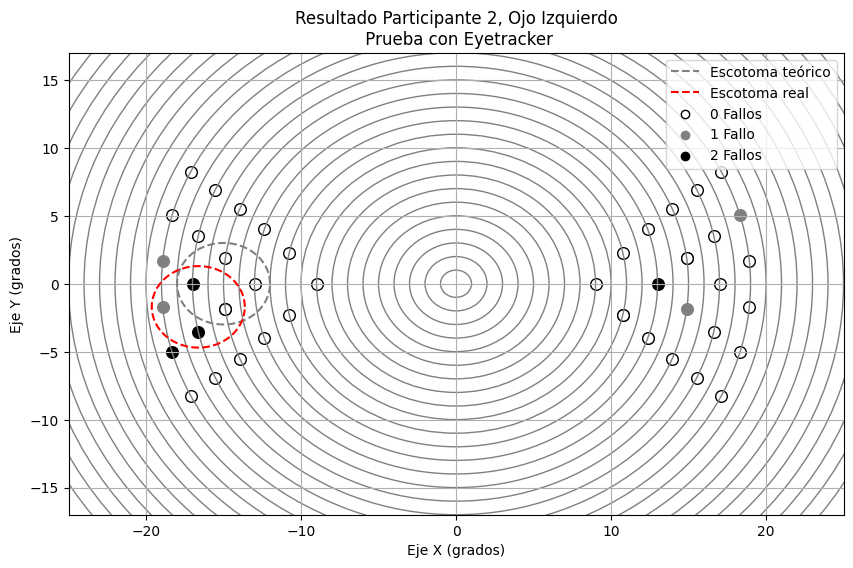

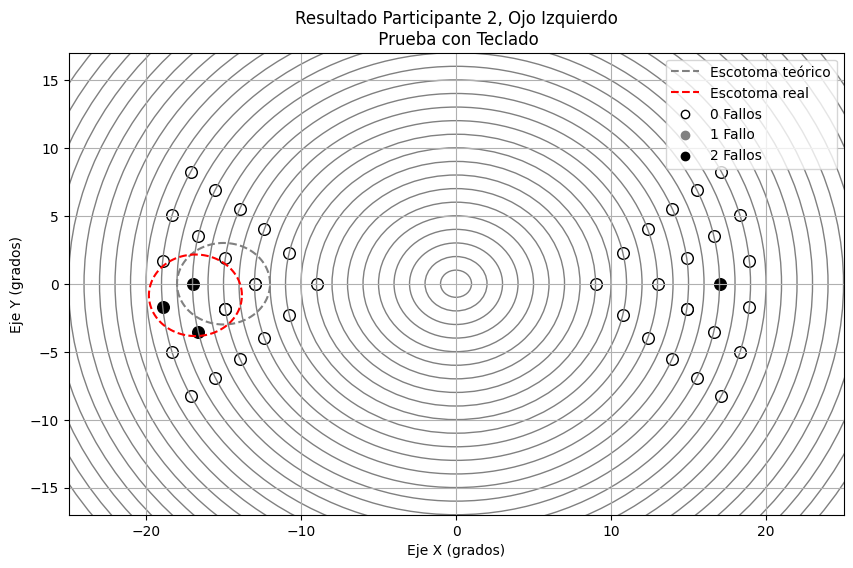

In [7]:
# Resultados Lucia 

prueba_eyetracker = pd.read_csv('Pruebas/Prueba_SujetoMauricio_OjoIzquierdo_Eyetracker.csv',delimiter=';')
prueba_teclado = pd.read_csv('Pruebas/Prueba_SujetoMauricio_OjoIzquierdo_Teclado.csv',delimiter=';')

grafica(prueba_eyetracker,'Participante 2','Izquierdo','Eyetracker')
grafica(prueba_teclado,'Participante 2','Izquierdo','Teclado')